In [6]:
import os
import cv2
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


pip install matplotlib opencv-python

pip install scikit-learn
pip install fastapi uvicorn

In [7]:


# Вкажіть шлях до папки з датасетом
dataset_path = 'Animal Image Dataset-Cats, Dogs, and Foxes'

# Отримуємо список всіх зображень та їх міток
image_paths = []
labels = []

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img_name))
            labels.append(label)

# Виводимо кількість зображень в кожному класі
label_counts = Counter(labels)
print("Кількість зображень в кожному класі:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Кількість зображень в кожному класі:
cat: 102
dog: 105
fox: 102


In [8]:

image_shapes = []
for img_path in image_paths[:100]:  # Аналізуємо перші 100 зображень для прикладу
    img = cv2.imread(img_path)
    if img is not None:
        image_shapes.append(img.shape)
    else:
        print(f"Не вдалося завантажити зображення: {img_path}")

# Виводимо унікальні розміри зображень
unique_shapes = set(image_shapes)
print("Унікальні розміри зображень:")
for shape in unique_shapes:
    print(shape)

Унікальні розміри зображень:
(168, 300, 3)
(2397, 1795, 3)
(980, 1471, 3)
(4000, 6000, 3)
(6000, 4000, 3)
(2804, 1862, 3)
(337, 500, 3)
(5000, 4000, 3)
(633, 736, 3)
(5409, 3606, 3)
(280, 173, 3)
(8192, 5461, 3)
(2848, 4272, 3)
(3669, 2744, 3)
(4523, 3096, 3)
(3648, 4909, 3)
(275, 183, 3)
(640, 530, 3)
(5616, 3744, 3)
(183, 276, 3)
(4016, 4016, 3)
(225, 225, 3)
(4026, 3072, 3)
(4608, 3072, 3)
(5760, 3840, 3)
(3790, 5414, 3)
(8192, 8192, 3)
(3823, 5734, 3)
(3156, 4734, 3)
(3648, 5472, 3)
(3373, 5059, 3)
(5304, 7952, 3)
(4160, 3328, 3)
(3583, 2380, 3)
(5184, 3456, 3)
(3744, 5616, 3)
(5312, 2988, 3)
(2657, 1771, 3)
(1920, 1280, 3)
(3677, 3677, 3)
(3466, 5200, 3)
(1365, 2048, 3)
(845, 1400, 3)
(5472, 3648, 3)
(210, 210, 3)
(5412, 3357, 3)
(2667, 4000, 3)
(4032, 3024, 3)
(612, 406, 3)
(1024, 683, 3)
(3072, 2048, 3)
(1448, 2832, 3)
(2848, 4288, 3)
(2422, 3634, 3)
(4504, 2938, 3)
(3448, 4840, 3)
(5853, 3774, 3)
(1080, 1080, 3)
(467, 700, 3)
(553, 500, 3)
(260, 194, 3)
(183, 275, 3)
(2500, 385

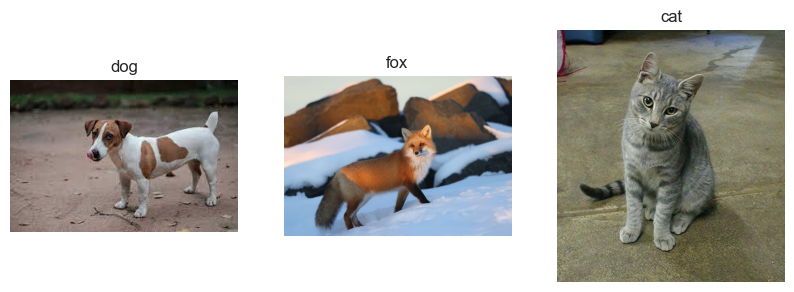

In [9]:

# Відображаємо по одному зображенню з кожного класу
unique_labels = list(set(labels))
plt.figure(figsize=(10, 5))
for i, label in enumerate(unique_labels):
    img_path = image_paths[labels.index(label)]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(unique_labels), i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()

In [10]:

# Створюємо об'єкт детектора ORB
orb = cv2.ORB_create(nfeatures=500)

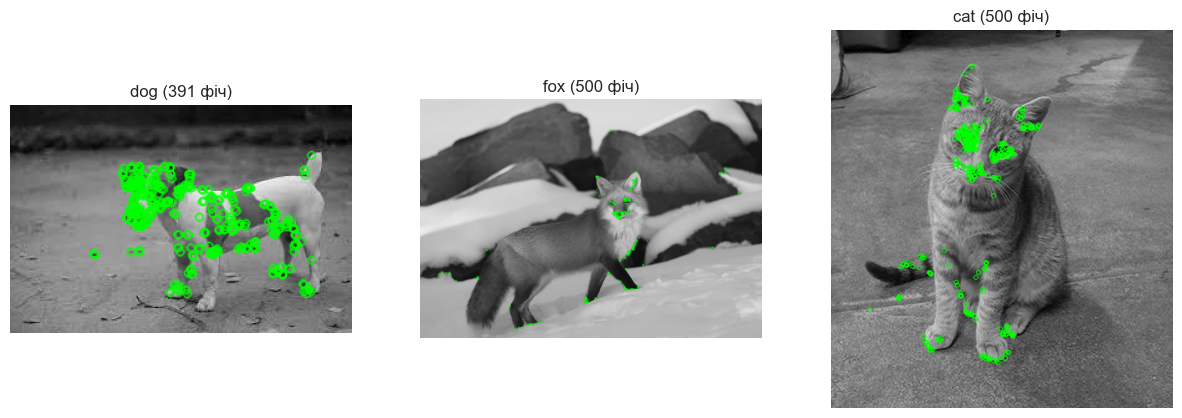

In [11]:
# Вибираємо по одному зображенню з кожного класу для детекції фіч
sample_images = []
for label in unique_labels:
    img_path = image_paths[labels.index(label)]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sample_images.append((img, label))

# Виконуємо детекцію та візуалізацію фіч
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, (img, label) in enumerate(sample_images):
    # Знаходимо ключові точки та дескриптори
    keypoints, descriptors = orb.detectAndCompute(img, None)
    
    # Малюємо ключові точки на зображенні
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)
    
    # Відображаємо результат
    plt.subplot(1, len(sample_images), i+1)
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title(f"{label} ({len(keypoints)} фіч)")
    plt.axis('off')
plt.show()

In [12]:
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
    return img

In [13]:
def resize_image(img, size=(128, 128)):
    resized_img = cv2.resize(img, size)
    return resized_img

In [14]:
def convert_to_grayscale(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

In [15]:
def normalize_image(img):
    normalized_img = img / 255.0
    return normalized_img

In [16]:
def get_color_statistics(img):
    stats = {}
    channels = cv2.split(img)
    colors = ('Blue', 'Green', 'Red')
    for (channel, color) in zip(channels, colors):
        stats[f'{color}_mean'] = np.mean(channel)
        stats[f'{color}_std'] = np.std(channel)
    return stats

In [17]:
def get_gray_statistics(img):
    stats = {}
    stats['Gray_mean'] = np.mean(img)
    stats['Gray_std'] = np.std(img)
    return stats

In [18]:
def preprocess_and_extract_features(image_path, resize_dim=(128, 128), to_gray=False, normalize=False):
    # Завантаження зображення
    img = load_image(image_path)
    
    # Ресайзинг
    img = resize_image(img, size=resize_dim)
    
    # Переведення у градації сірого (якщо потрібно)
    if to_gray:
        img = convert_to_grayscale(img)
        # Обчислення статистики для градацій сірого
        stats = get_gray_statistics(img)
    else:
        # Обчислення статистики для кольорових каналів
        stats = get_color_statistics(img)
    
    # Нормалізація (якщо потрібно)
    if normalize:
        img = normalize_image(img)
    
    return img, stats

In [19]:
# Припускаємо, що dataset_path вже задано
dataset_path = 'Animal Image Dataset-Cats, Dogs, and Foxes'

image_paths = []
labels = []

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img_name))
            labels.append(label)

In [20]:
def preprocess_and_extract_features(image_path, resize_dim=(128, 128), to_gray=False, normalize=False):
    # Завантаження зображення
    img = load_image(image_path)
    
    # Перевіряємо, чи зображення завантажилося
    if img is None:
        print(f"Зображення не завантажено, пропускаємо файл: {image_path}")
        return None, None  # Повертаємо None, щоб вказати на пропуск
    
    # Ресайзинг
    img = resize_image(img, size=resize_dim)
    
    # Переведення у градації сірого (якщо потрібно)
    if to_gray:
        img = convert_to_grayscale(img)
        # Обчислення статистики для градацій сірого
        stats = get_gray_statistics(img)
    else:
        # Обчислення статистики для кольорових каналів
        stats = get_color_statistics(img)
    
    # Нормалізація (якщо потрібно)
    if normalize:
        img = normalize_image(img)
    
    return img, stats

In [21]:
preprocessed_images = []
all_stats = []

for img_path, label in zip(image_paths, labels):
    img, stats = preprocess_and_extract_features(
        img_path, 
        resize_dim=(128, 128), 
        to_gray=False, 
        normalize=True
    )
    # Перевіряємо, чи img та stats не None
    if img is not None and stats is not None:
        preprocessed_images.append(img)
        stats['label'] = label
        all_stats.append(stats)
    else:
        print(f"Пропускаємо зображення: {img_path}")

In [22]:
# Створюємо DataFrame зі списку статистик
stats_df = pd.DataFrame(all_stats)

# Переглядаємо перші рядки DataFrame
print(stats_df.head())

    Blue_mean   Blue_std  Green_mean  Green_std    Red_mean    Red_std label
0   93.874573  30.152308  113.424133  30.778989  114.443237  31.616709   cat
1  208.564514  66.491555  213.576233  60.215667  218.274048  51.855267   cat
2  182.139893  60.023900  183.363281  59.817363  188.450928  56.872050   cat
3  106.365845  47.904700  128.683289  50.846295  142.919067  53.595836   cat
4  175.449951  87.185225  165.048035  73.819995  151.664307  63.868426   cat


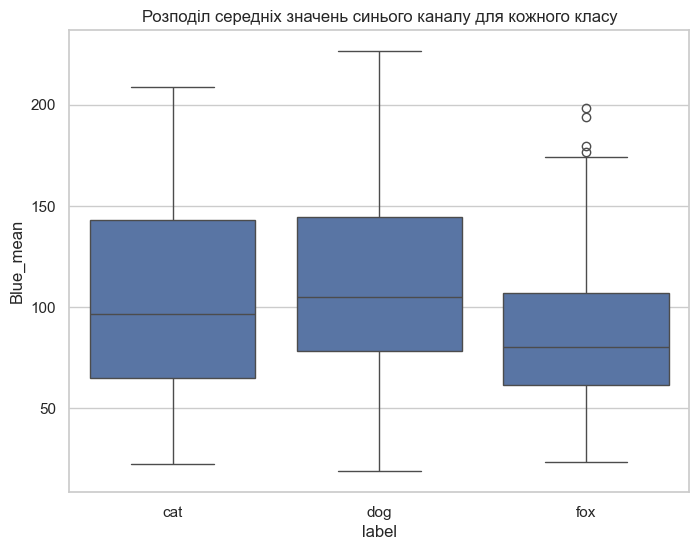

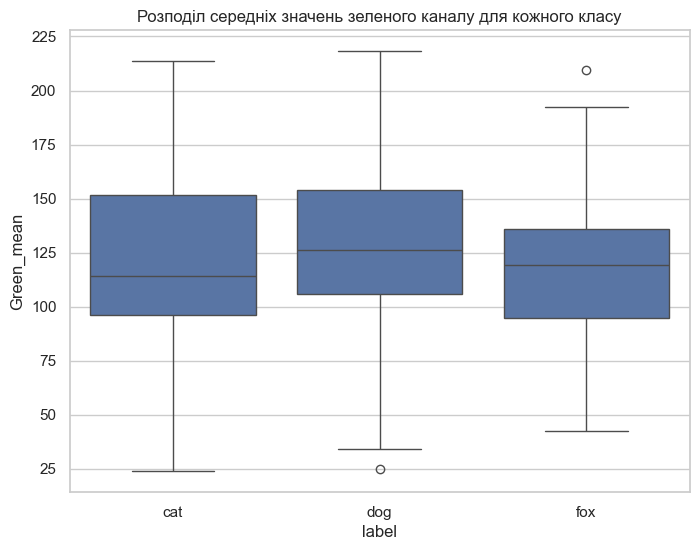

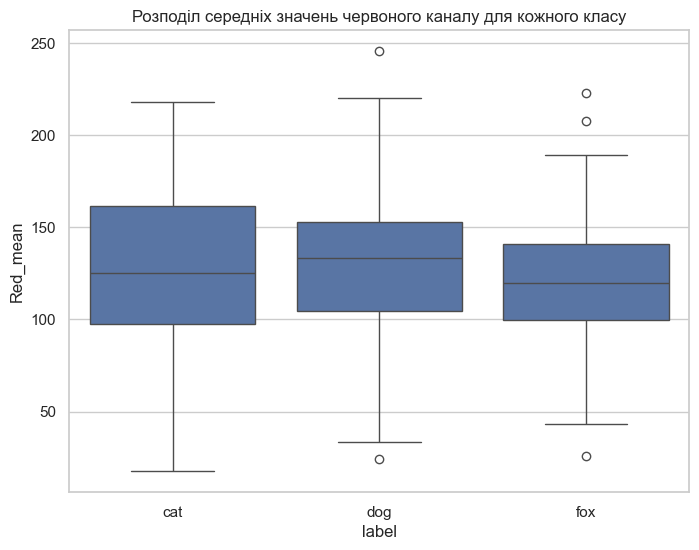

In [23]:
sns.set(style='whitegrid')

# Середні значення синього каналу
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Blue_mean', data=stats_df)
plt.title('Розподіл середніх значень синього каналу для кожного класу')
plt.show()

# Середні значення зеленого каналу
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Green_mean', data=stats_df)
plt.title('Розподіл середніх значень зеленого каналу для кожного класу')
plt.show()

# Середні значення червоного каналу
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Red_mean', data=stats_df)
plt.title('Розподіл середніх значень червоного каналу для кожного класу')
plt.show()

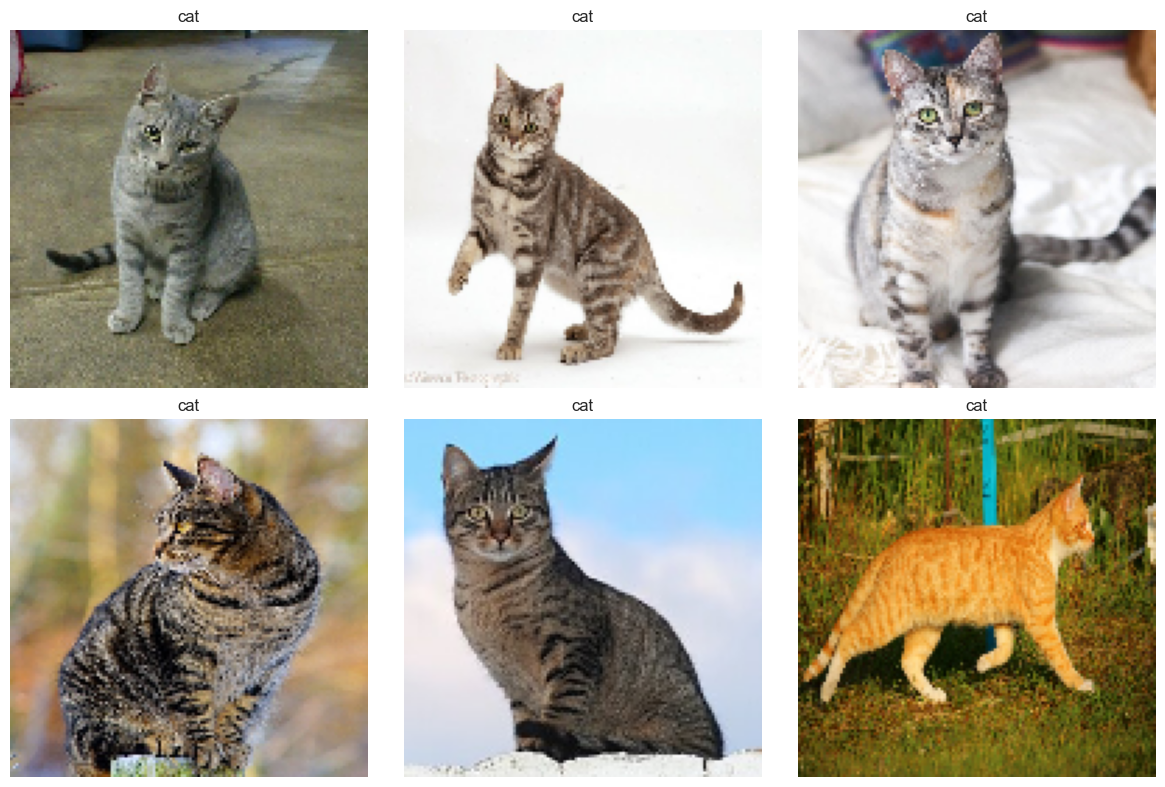

In [24]:

plt.figure(figsize=(12, 8))
for i in range(6):
    img = preprocessed_images[i]
    label = labels[i]
    
    # Перевіряємо тип даних зображення
    if img.dtype != np.uint8:
        # Конвертуємо зображення у діапазон [0, 255] та тип uint8
        img_uint8 = (img * 255).astype(np.uint8)
    else:
        img_uint8 = img
    
    # Конвертуємо з BGR у RGB
    img_rgb = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
output_dir = 'preprocessed_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [26]:
for img, label, img_path in zip(preprocessed_images, labels, image_paths):
    # Отримуємо ім'я файлу
    img_name = os.path.basename(img_path)
    
    # Розбиваємо ім'я файлу на назву та розширення
    img_name_base, img_ext = os.path.splitext(img_name)
    
    # Список підтримуваних розширень
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    
    # Якщо розширення відсутнє або некоректне, встановлюємо за замовчуванням '.jpg'
    if img_ext.lower() not in valid_extensions:
        print(f"Некоректне або відсутнє розширення для файлу {img_name}, встановлюємо '.jpg'")
        img_ext = '.jpg'
        img_name = img_name_base + img_ext
    
    # Створюємо папку для кожного класу
    class_dir = os.path.join(output_dir, label)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    
    # Шлях для збереження зображення
    save_path = os.path.join(class_dir, img_name)
    
    # Якщо зображення нормалізоване, повертаємо його до діапазону [0, 255]
    if img.dtype == np.float32 or img.dtype == np.float64:
        img_to_save = (img * 255).astype(np.uint8)
    else:
        img_to_save = img
    
    # Зберігаємо зображення
    success = cv2.imwrite(save_path, img_to_save)
    if not success:
        print(f"Не вдалося зберегти зображення: {save_path}")

In [27]:
print(f"Кількість зображень: {len(preprocessed_images)}")
print(f"Кількість міток: {len(labels)}")

Кількість зображень: 309
Кількість міток: 309


In [28]:
# Перетворюємо список зображень у масив NumPy
X = np.array(preprocessed_images)
y = np.array(labels)

# Перевіряємо форму масиву
print(f"Форма масиву X: {X.shape}")
print(f"Форма масиву y: {y.shape}")

Форма масиву X: (309, 128, 128, 3)
Форма масиву y: (309,)


In [29]:

# Визначаємо розмір тестової вибірки (наприклад, 20%)
test_size = 0.2
random_state = 42  # Для відтворюваності результатів

# Розбиваємо дані
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

# Перевіряємо розміри вибірок
print(f"Розмір тренувальної вибірки: {X_train.shape[0]} зображень")
print(f"Розмір тестової вибірки: {X_test.shape[0]} зображень")

Розмір тренувальної вибірки: 247 зображень
Розмір тестової вибірки: 62 зображень


In [30]:
# Функція для випрямлення зображень
def flatten_images(X):
    num_samples = X.shape[0]
    # Визначаємо розмір одного зображення після випрямлення
    img_size = X.shape[1] * X.shape[2] * X.shape[3]
    # Перетворюємо у двовимірний масив розміром (кількість зразків, розмір вектора)
    X_flattened = X.reshape(num_samples, img_size)
    return X_flattened

# Випрямляємо зображення
X_train_flat = flatten_images(X_train)
X_test_flat = flatten_images(X_test)

# Перевіряємо форму отриманих масивів
print(f"Форма X_train після випрямлення: {X_train_flat.shape}")
print(f"Форма X_test після випрямлення: {X_test_flat.shape}")

Форма X_train після випрямлення: (247, 49152)
Форма X_test після випрямлення: (62, 49152)


In [31]:

# Ініціалізуємо енкодер
label_encoder = LabelEncoder()

# Навчаємо енкодер та перетворюємо мітки
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Виводимо відповідність між класами та їх числовими значеннями
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Відповідність між класами та їх числовими значеннями:")
print(class_mapping)

Відповідність між класами та їх числовими значеннями:
{'cat': 0, 'dog': 1, 'fox': 2}


In [32]:

# Ініціалізуємо модель
model = LogisticRegression(max_iter=1000, random_state=42)

# Навчаємо модель на тренувальних даних
model.fit(X_train_flat, y_train_enc)

# Перевіряємо точність на тренувальних даних
train_accuracy = model.score(X_train_flat, y_train_enc)
print(f"Точність на тренувальних даних: {train_accuracy:.4f}")

Точність на тренувальних даних: 1.0000


In [33]:
# Прогнозуємо на тестових даних
y_pred = model.predict(X_test_flat)

# Обчислюємо точність на тестових даних

test_accuracy = accuracy_score(y_test_enc, y_pred)
print(f"Точність на тестових даних: {test_accuracy:.4f}")

Точність на тестових даних: 0.4677


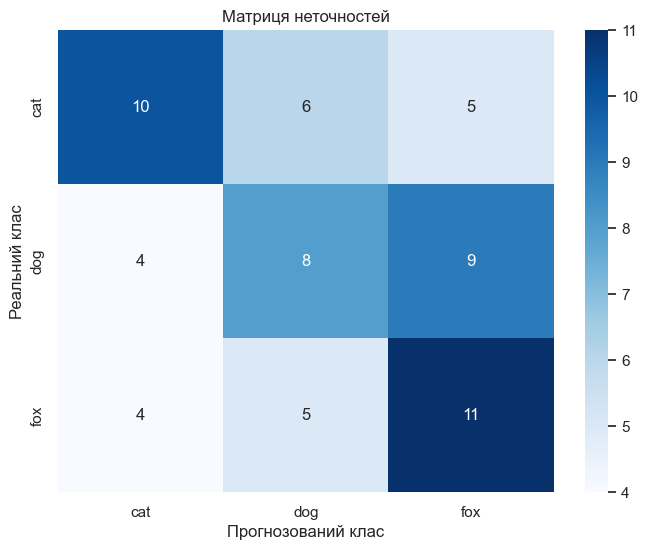

In [34]:

# Обчислюємо матрицю неточностей
cm = confusion_matrix(y_test_enc, y_pred)

# Візуалізуємо матрицю
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Прогнозований клас')
plt.ylabel('Реальний клас')
plt.title('Матриця неточностей')
plt.show()

In [35]:

# Виводимо детальний звіт
report_firstM = classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_)
print("Звіт класифікації:")
print(report_firstM)

Звіт класифікації:
              precision    recall  f1-score   support

         cat       0.56      0.48      0.51        21
         dog       0.42      0.38      0.40        21
         fox       0.44      0.55      0.49        20

    accuracy                           0.47        62
   macro avg       0.47      0.47      0.47        62
weighted avg       0.47      0.47      0.47        62


In [36]:
# Припускаємо, що dataset_path вже задано
dataset_path = 'preprocessed_images'

image_paths = []
labels = []

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image_paths.append(img_path)
            labels.append(label)

# Перетворюємо у масиви NumPy
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Загальна кількість зображень: {len(image_paths)}")

Загальна кількість зображень: 309


In [37]:
# Розбиваємо дані
X_train, X_test, y_train, y_test = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

In [38]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Класи та їх числові значення:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Класи та їх числові значення: {'cat': 0, 'dog': 1, 'fox': 2}


In [39]:
# Ініціалізуємо детектор ORB
orb = cv2.ORB_create(nfeatures=2000)
sift = cv2.SIFT_create()


In [40]:
def get_descriptors(image_path, detector):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    keypoints, descriptors = detector.detectAndCompute(img, None)
    return descriptors

In [41]:
# Список для всіх дескрипторів
descriptor_list = []

for img_path in X_train:
    descriptors = get_descriptors(img_path, sift)
    if descriptors is not None:
        descriptor_list.extend(descriptors)
    else:
        print(f"Пропускаємо зображення: {img_path}")

descriptor_list = np.array(descriptor_list)

print(f"Загальна кількість дескрипторів: {descriptor_list.shape}")

Загальна кількість дескрипторів: (32881, 128)


In [42]:
num_clusters = 500

In [43]:
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=num_clusters * 20, random_state=42)
kmeans.fit(descriptor_list)

G:\Ilya\TML\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "G:\Ilya\TML\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


MiniBatchKMeans(batch_size=10000, n_clusters=500, random_state=42)

In [44]:
def get_image_feature_vector(image_path, detector, kmeans_model):
    descriptors = get_descriptors(image_path, detector)
    if descriptors is not None:
        # Прогнозуємо кластери для дескрипторів зображення
        clusters = kmeans_model.predict(descriptors)
        # Створюємо гістограму
        hist, _ = np.histogram(clusters, bins=np.arange(num_clusters + 1))
        # Нормалізуємо гістограму
        hist = hist.astype(float)
        hist /= (hist.sum() + 1e-7)
        return hist
    else:
        return None

In [45]:
def get_all_image_features(image_paths, detector, kmeans_model, labels):
    features = []
    valid_labels = []
    for img_path, label in zip(image_paths, labels):
        hist = get_image_feature_vector(img_path, detector, kmeans_model)
        if hist is not None:
            features.append(hist)
            valid_labels.append(label)
        else:
            print(f"Пропускаємо зображення: {img_path}")
    return np.array(features), np.array(valid_labels)

# Отримуємо ознаки та мітки для тренувальної вибірки
X_train_features, y_train_valid = get_all_image_features(X_train, sift, kmeans, y_train_enc)

# Отримуємо ознаки та мітки для тестової вибірки
X_test_features, y_test_valid = get_all_image_features(X_test, sift, kmeans, y_test_enc)

In [46]:
print(f"Кількість тренувальних ознак: {X_train_features.shape[0]}")
print(f"Кількість тренувальних міток: {y_train_valid.shape[0]}")

print(f"Кількість тестових ознак: {X_test_features.shape[0]}")
print(f"Кількість тестових міток: {y_test_valid.shape[0]}")

Кількість тренувальних ознак: 247
Кількість тренувальних міток: 247
Кількість тестових ознак: 62
Кількість тестових міток: 62


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

In [48]:
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train_valid)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [49]:
train_accuracy = svm_model.score(X_train_scaled, y_train_valid)
print(f"Точність на тренувальних даних: {train_accuracy:.4f}")

Точність на тренувальних даних: 1.0000


In [50]:
y_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test_valid, y_pred)
print(f"Точність на тестових даних: {test_accuracy:.4f}")

Точність на тестових даних: 0.4677


In [51]:
print('Train', Counter(y_train_valid))
print('Test', Counter(y_test_valid))

Train Counter({1: 84, 2: 82, 0: 81})
Test Counter({0: 21, 1: 21, 2: 20})


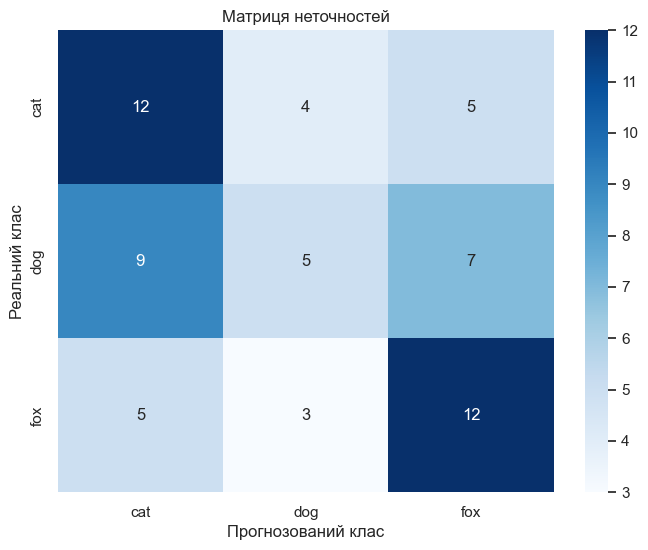

Звіт класифікації:
              precision    recall  f1-score   support

         cat       0.46      0.57      0.51        21
         dog       0.42      0.24      0.30        21
         fox       0.50      0.60      0.55        20

    accuracy                           0.47        62
   macro avg       0.46      0.47      0.45        62
weighted avg       0.46      0.47      0.45        62


In [52]:
# Матриця неточностей
cm = confusion_matrix(y_test_valid, y_pred)

# Візуалізація матриці неточностей
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Прогнозований клас')
plt.ylabel('Реальний клас')
plt.title('Матриця неточностей')
plt.show()

# Звіт класифікації
report = classification_report(y_test_valid, y_pred, target_names=label_encoder.classes_)
print("Звіт класифікації:")
print(report)

In [53]:
def visualize_histogram(image_path, detector, kmeans_model):
    hist = get_image_feature_vector(image_path, detector, kmeans_model)
    if hist is not None:
        plt.figure(figsize=(10, 4))
        plt.bar(range(num_clusters), hist, width=0.8, color='blue')
        plt.xlabel('Індекс візуального слова')
        plt.ylabel('Частота')
        plt.title('Гістограма візуальних слів')
        plt.show()
    else:
        print(f"Не вдалося обробити зображення: {image_path}")

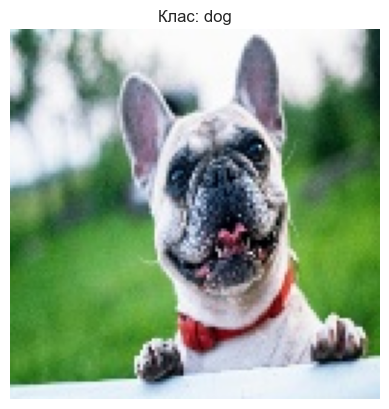

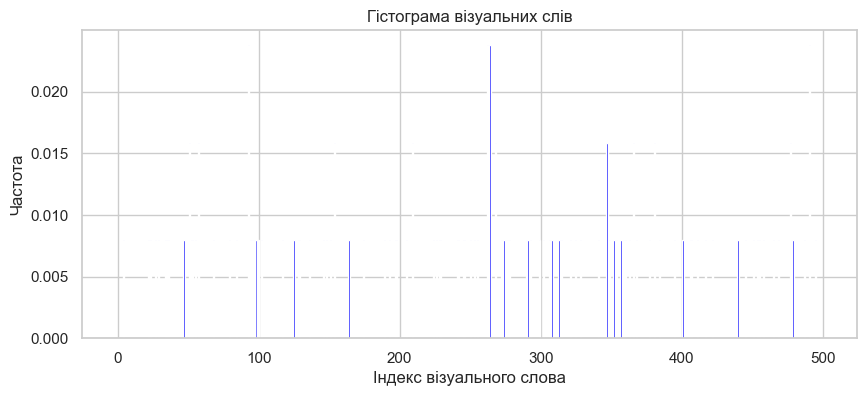

In [54]:
# Вибираємо випадкове зображення з тестової вибірки
import random

random_idx = random.randint(0, len(X_test) - 1)
sample_image_path = X_test[random_idx]
sample_label = y_test[random_idx]

# Відображаємо зображення
img = cv2.imread(sample_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Клас: {sample_label}")
plt.axis('off')
plt.show()

# Візуалізуємо гістограму візуальних слів
visualize_histogram(sample_image_path, sift, kmeans)

In [55]:
import joblib

# Збереження моделі класифікатора
joblib.dump(svm_model, 'svm_model.pkl')

# Збереження KMeans моделі
joblib.dump(kmeans, 'kmeans_model.pkl')

# Збереження LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Збереження StandardScaler (якщо використовували)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']